# Tensorflow 2 Intro

## Get Dataset

In [1]:
import tensorflow as tf
# tf.__version__

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Get the data shape

In [4]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

(60000, 28, 28)
(60000,)
5


Take a look into the data

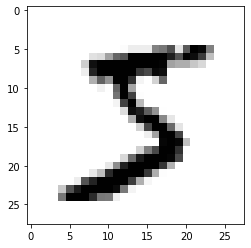

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = plt.cm.binary)

## Data Modify

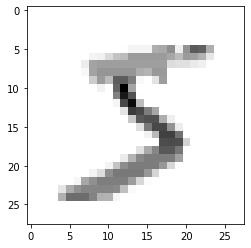

In [8]:
x_train = tf.keras.utils.normalize(x_train)
x_test  = tf.keras.utils.normalize(x_test)

plt.imshow(x_train[0],cmap = plt.cm.binary)

## Build the train model

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

## Train the model

In [15]:
model.compile(
    optimizer= "Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 1s 759us/step - loss: 0.0566 - accuracy: 0.9813
Epoch 2/3
1875/1875 [==============================] - 1s 753us/step - loss: 0.0423 - accuracy: 0.9861
Epoch 3/3
1875/1875 [==============================] - 1s 756us/step - loss: 0.0325 - accuracy: 0.9893


## Validation

In [17]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 505us/step - loss: 0.0934 - accuracy: 0.9754
0.09338744729757309 0.9753999710083008


## Save model

In [21]:
model.save("num_reader.model")

INFO:tensorflow:Assets written to: num_reader.model/assets


## Load Model

In [22]:
new_model = tf.keras.models.load_model("num_reader.model")

In [23]:
predictions = new_model.predict(x_test)

In [29]:
print(predictions.shape)

(10000, 10)


In [31]:
import numpy as np
predict_num = np.argmax(predictions, axis=1)
print(predict_num.shape)

(10000,)


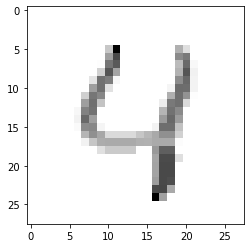

In [33]:
plt.imshow(x_test[4], cmap=plt.cm.binary)

In [34]:
print(predict_num[4])

4
